In [128]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [129]:
#load train and test files
train = pd.read_csv('train_BRCpofr.csv')
test = pd.read_csv('test_koRSKBP.csv')

In [130]:
print(train.shape, test.shape)

(89392, 12) (59595, 11)


In [131]:
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [132]:
train[['claim_amount', 'cltv']].describe()

,claim_amount,cltv
count,89392.000000,89392.000000
mean,4351.502416,97952.828978
std,3262.359775,90613.814793
min,0.000000,24828.000000
25%,2406.000000,52836.000000
50%,4089.000000,66396.000000
75%,6094.000000,103440.000000
max,31894.000000,724068.000000


<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

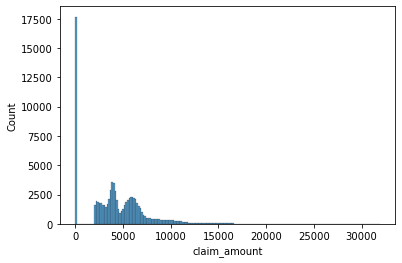

In [133]:
sns.histplot((train.claim_amount))

<AxesSubplot:xlabel='cltv', ylabel='Count'>

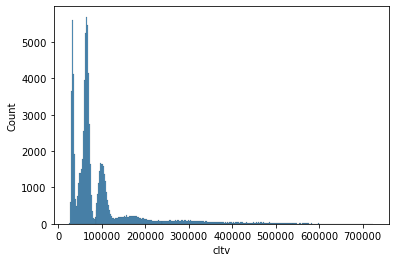

In [134]:
sns.histplot((train.cltv))

In [135]:
train.policy.unique()

array(['A', 'C', 'B'], dtype=object)

In [136]:
train.type_of_policy.unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

In [137]:
train.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [138]:
train.vintage.unique()

array([5, 8, 7, 6, 1, 0, 3, 4, 2], dtype=int64)

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [140]:
 for col in train.select_dtypes(['object']).columns:
        print(col, train[col].unique())

gender ['Male' 'Female']
area ['Urban' 'Rural']
qualification ['Bachelor' 'High School' 'Others']
income ['5L-10L' 'More than 10L' '2L-5L' '<=2L']
num_policies ['More than 1' '1']
policy ['A' 'C' 'B']
type_of_policy ['Platinum' 'Gold' 'Silver']


In [141]:
qualification_dict = {'Others': 0,'High School':1, 'Bachelor': 2}
income_dict = {'<=2L': 0,  '2L-5L':1, '5L-10L':2,  'More than 10L' :3 }
num_policies_dict =  {'1': 0,'More than 1': 1 }
type_of_policy_dict = { 'Silver': 0,  'Gold' : 1 , 'Platinum': 2}

In [142]:
train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [143]:
def label_df(df):
    qualification_dict = {'Others': 0,'High School':1, 'Bachelor': 2}
    income_dict = {'<=2L': 0,  '2L-5L':1, '5L-10L':2,  'More than 10L' :3 }
    num_policies_dict =  {'1': 0,'More than 1': 1 }
    type_of_policy_dict = { 'Silver': 0,  'Gold' : 1 , 'Platinum': 2}
    
    df['qualification'] = df['qualification'].map(qualification_dict)
    df['income'] = df['income'].map(income_dict)
    df['num_policies'] = df['num_policies'].map(num_policies_dict)
    df['type_of_policy'] =  df['type_of_policy'].map(type_of_policy_dict)   
    
    return df

In [144]:
label_df(train)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,2,2,1,5,5790,1,A,2,64308
1,2,Male,Rural,1,2,0,8,5080,1,A,2,515400
2,3,Male,Urban,2,2,1,8,2599,1,A,2,64212
3,4,Female,Rural,1,2,0,7,0,1,A,2,97920
4,5,Male,Urban,1,3,1,6,3508,1,A,1,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,1,3,0,6,0,1,B,2,95736
89388,89389,Male,Urban,2,2,1,0,3897,1,A,2,67596
89389,89390,Female,Urban,2,2,0,4,3363,1,B,2,114120
89390,89391,Female,Rural,1,1,0,8,0,1,B,2,71772


In [145]:
label_df(test)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,1,2,0,6,2134,1,B,0
1,89394,Female,Urban,1,1,0,4,4102,1,A,2
2,89395,Male,Rural,1,2,1,7,2925,1,B,1
3,89396,Female,Rural,2,3,1,2,0,1,B,0
4,89397,Female,Urban,1,1,0,5,14059,1,B,0
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,2,2,1,6,0,0,A,0
59591,148984,Male,Urban,1,2,0,6,0,0,C,1
59592,148985,Female,Urban,1,1,1,4,3323,1,B,2
59593,148986,Male,Rural,2,2,0,1,2886,1,A,0


In [146]:
train = pd.get_dummies(train, drop_first = True)

In [147]:
test  = pd.get_dummies(test, drop_first = True)

In [148]:
train_features = train.drop(['id', 'cltv'], axis = 'columns')

In [149]:
train_target = train['cltv']

In [150]:
test_features = test.drop(['id'], axis = 'columns')

In [151]:
from xgboost import XGBRFRegressor

In [152]:
from sklearn.model_selection import cross_val_score

In [153]:
model_eval = []

n_estimators=  [100, 200, 500, 1000]
learning_rate = [2,1,0.5,0.75]
    
for n in n_estimators:
    for lr in learning_rate:
        model = XGBRFRegressor(learning_rate=lr,n_estimators=n) # 
        r2_score = cross_val_score(model, train_features,train_target, cv = 5, scoring = 'r2').mean()
        neg_mean_squared_error = cross_val_score(model, train_features, train_target, cv =5, 
                                            scoring = 'neg_mean_squared_error').mean()
        model_eval.append(['XGBRFRegressor',n,lr, r2_score, neg_mean_squared_error])
        model.fit(train_features, train_target)
        print(model.predict(test_features))
        test['cltv'] = model.predict(test_features)
        submission = test[['id','cltv']]
        submission.to_csv('XGBRFR'+'n_'+str(n)+'lr_'+str(lr)+'.csv', index = False)

[181239.44 250783.67 186463.5  ... 206245.28 215704.58 244347.58]
[ 90619.97  125392.086  93232.    ... 103122.89  107852.54  122174.04 ]
[45310.234 62696.293 46616.25  ... 51561.695 53926.52  61087.27 ]
[67965.086 94044.16  69924.13  ... 77342.31  80889.51  91630.664]
[181393.64 251891.56 185424.94 ... 205411.58 215482.19 243609.62]
[ 90697.07 125946.03  92712.72 ... 102706.04 107741.34 121805.06]
[45348.785 62973.266 46356.61  ... 51353.27  53870.92  60902.78 ]
[68022.914 94459.64  69534.66  ... 77029.65  80806.17  91353.95 ]
[181601.73 251844.25 185725.7  ... 205125.3  216210.6  243722.5 ]
[ 90801.12  125922.375  92863.1   ... 102562.9   108105.55  121861.5  ]
[45400.81  62961.438 46431.8   ... 51281.7   54053.023 60931.   ]
[68100.96  94441.875 69647.47  ... 76922.234 81079.31  91396.23 ]
[181463.98 251834.08 185627.86 ... 205676.64 216055.31 244146.78]
[ 90732.24 125917.29  92814.18 ... 102838.57 108027.91 122073.64]
[45366.37  62958.895 46407.34  ... 51419.535 54014.203 61037.07 

In [154]:
model_scores = pd.DataFrame(model_eval, columns = ['model_name', 'n_estimators', 'learning_rate',
                                                    'r2_score', 'neg_mean_squared_error'])

In [155]:
model_scores.sort_values('r2_score', ascending = False)

,model_name,n_estimators,learning_rate,r2_score,neg_mean_squared_error
9,XGBRFRegressor,500,1.00,0.158681,-6.908317e+09
13,XGBRFRegressor,1000,1.00,0.158671,-6.908392e+09
5,XGBRFRegressor,200,1.00,0.158656,-6.908513e+09
1,XGBRFRegressor,100,1.00,0.158585,-6.909093e+09
3,XGBRFRegressor,100,0.75,0.075587,-7.590988e+09
7,XGBRFRegressor,200,0.75,0.075570,-7.591126e+09
15,XGBRFRegressor,1000,0.75,0.075555,-7.591263e+09
11,XGBRFRegressor,500,0.75,0.075526,-7.591501e+09
2,XGBRFRegressor,100,0.50,-0.173376,-9.634341e+09
6,XGBRFRegressor,200,0.50,-0.173433,-9.634815e+09
